In [1]:
%matplotlib inline
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import pandas as pd

from root_numpy import root2array

In [3]:
filedir = '/Users/davidkaleko/larlite/UserDev/KalekoAna/CCInclusive/mac/'

In [18]:
def nExpectedEvents(df, mybasequery=None):
    basequery = 'nu_E_estimate > 2.5 and second_longest_trk_len > 20.'
    basequery += ' and longest_tracks_dotprod_trkendpoints > -0.5'
    if mybasequery:
        basequery = mybasequery
    n_correct = len(df.FilterTrue.query(basequery).query('correct_ID == 1 and fndecay < 10'))
    n_pionMID = len(df.FilterTrue.query(basequery).query('correct_ID == 1 and fndecay >= 10'))
    n_cosmMID = len(df.FilterTrue.query(basequery).query('correct_ID == 0'))
    n_cosmMID += len(df.FilterFlip.query(basequery).query('correct_ID == 0'))
    n_correct *= (3./2)
    n_pionMID *= (3./2)
    n_cosmMID *= 5. * (3./2)
    
    return (n_correct, n_pionMID, n_cosmMID)

In [19]:
myfile2 = filedir + 'batch_out/XiaoEventAna_out_filterflip1_radius4.00.root'
myfile1 = filedir + 'batch_out/XiaoEventAna_out_filterflip0_radius4.00.root'
dflist = [ pd.DataFrame( root2array( myfile1, 'tree' ) ), 
              pd.DataFrame( root2array( myfile2, 'tree' ) ) ]
df_yesmichel = pd.concat(dflist,axis=1,keys=['FilterTrue','FilterFlip'])

myfile2 = filedir + 'XiaoEventAna_out_FILTERFLIP_NOMICHELTAGGING.root'
myfile1 = filedir + 'XiaoEventAna_out_BNBcosmic_NOMICHELTAGGING.root'
dflist = [ pd.DataFrame( root2array( myfile1, 'tree' ) ), 
              pd.DataFrame( root2array( myfile2, 'tree' ) ) ]
df_nomichel = pd.concat(dflist,axis=1,keys=['FilterTrue','FilterFlip'])

In [20]:
print nExpectedEvents(df_yesmichel)

(177.0, 33.0, 7.5)


In [21]:
print nExpectedEvents(df_nomichel)

(181.5, 36.0, 15.0)


In [16]:
df_yesmichel.FilterFlip.columns.values

array(['true_nu_pdg', 'true_nu_E', 'true_nu_CCNC', 'true_nu_mode',
       'mu_contained', 'p_phi', 'mu_phi', 'correct_ID', 'mu_end_dedx',
       'mu_start_dedx', 'fndecay', 'mu_p_dirdot', 'true_lepton_pdg',
       'true_lepton_momentum', 'n_associated_tracks', 'longest_trk_len',
       'second_longest_trk_len', 'longest_trk_theta',
       'longest_trk_MCS_mom', 'nu_E_estimate', 'true_nu_x', 'true_nu_y',
       'true_nu_z', 'dist_reco_true_vtx', 'max_tracks_dotprod',
       'longest_tracks_dotprod', 'longest_tracks_dotprod_trkendpoints'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113309790>]], dtype=object)

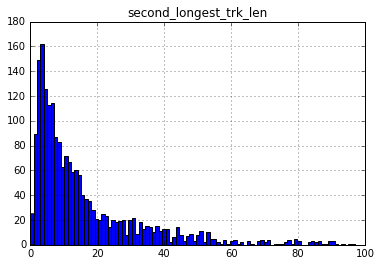

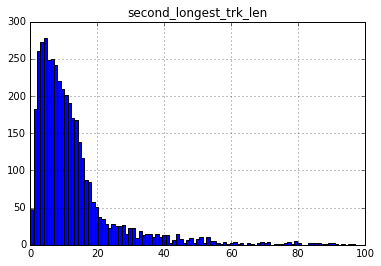

In [17]:
mybins = np.linspace(0,100,100)
df_yesmichel.FilterFlip.hist('second_longest_trk_len',bins=mybins)
df_nomichel.FilterFlip.hist('second_longest_trk_len',bins=mybins)